In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd

btc = yf.Ticker('BTC-USD')
data = btc.history(period='max')

data.to_csv('bitcoin_data.csv')

print(data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

                             Volume  Dividends  Stock Splits  
Date                                                          
2014-09-17 00:00:00+00:00  21056800        0.0           0.0  
2014-09-18 00:00:00+00:00  34483200        0.0           0.0  
2014-09-19 00:00:00+00:00  37919700        0.0           0.0  
2014-09-20 00:00:00+00:00  36863600        0.0           0.0  
2014-09-21 00:00:00+00:00  26580100        0.0           0.0  


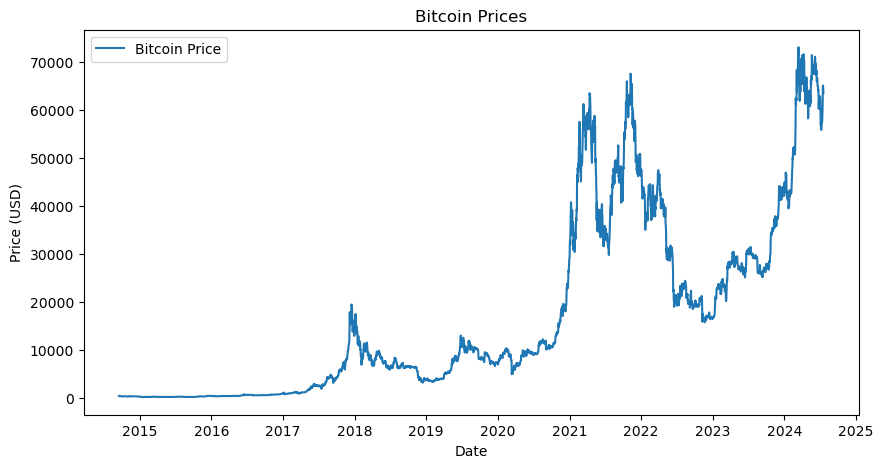

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('bitcoin_data.csv', index_col='Date', parse_dates=True)

plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Bitcoin Price')
plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

C:\Users\Elbraa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Elbraa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Elbraa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


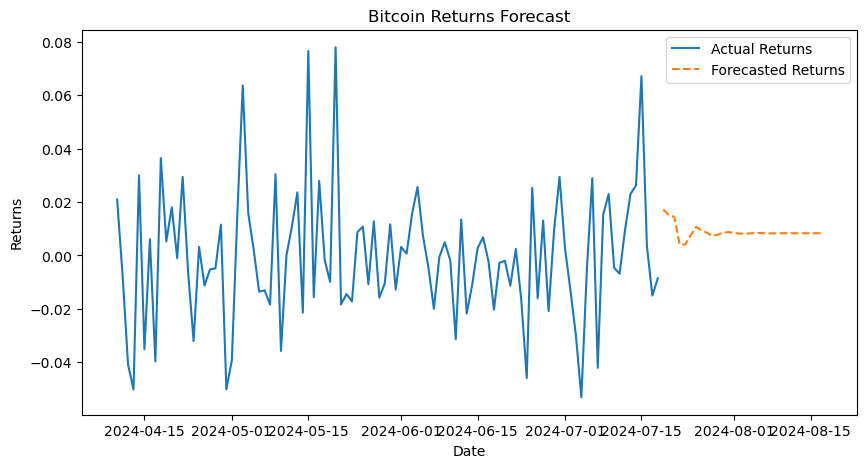

In [7]:
from statsmodels.tsa.arima.model import ARIMA

data['Returns'] = data['Close'].pct_change().dropna()

model = ARIMA(data['Returns'], order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(10, 5))
plt.plot(data.index[-100:], data['Returns'][-100:], label='Actual Returns')
plt.plot(forecast.index, forecast, label='Forecasted Returns', linestyle='--')
plt.title('Bitcoin Returns Forecast')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [11]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


C:\Users\Elbraa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - loss: 0.0158
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - loss: 7.4669e-04
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 5.9106e-04
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 6.2376e-04
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - loss: 4.5298e-04
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - loss: 4.3076e-04
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - loss: 4.4657e-04
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - loss: 3.6252e-04
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - loss: 3.6071e-04
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - loss: 3.9287e-04
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 3.6579e-04
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 2.8625e-04
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - loss: 3.2535e-04
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 2.

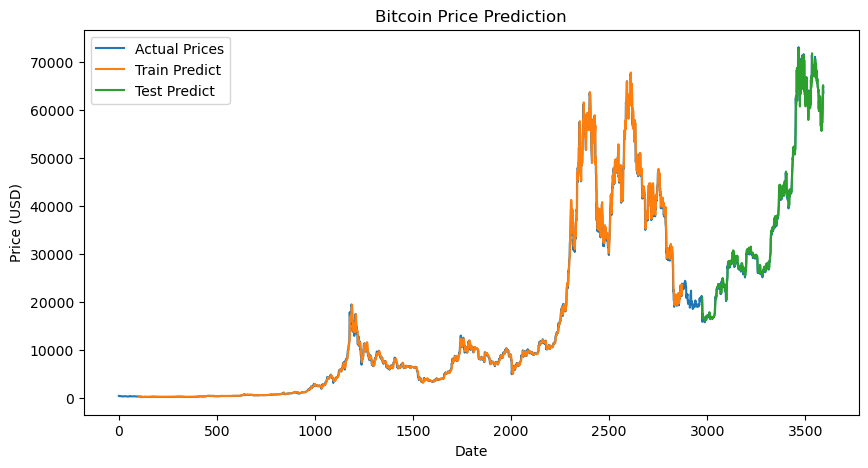

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

data = pd.read_csv('bitcoin_data.csv', index_col='Date', parse_dates=True)
data = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

plt.figure(figsize=(10, 5))
plt.plot(data, label='Actual Prices')
plt.plot(np.arange(time_step, len(train_predict) + time_step), train_predict, label='Train Predict')
plt.plot(np.arange(len(train_predict) + (time_step * 2) + 1, len(data) - 1), test_predict, label='Test Predict')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()